# 3 неделя обучения

# 3.1 Снова возвращаемся к деревьям

Вынесем занова данные по данным "титаника", так как автор иногда перпрыгивает с одной части на другую

In [93]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [9]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [10]:
titanik_data = pd.read_csv('train.csv')

In [11]:
X = titanik_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X = X.fillna({'Age' : X.Age.median()})
X = pd.get_dummies(X)

In [12]:
y = titanik_data.Survived

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

Постороим заново дерево решений и посмотрим как влияют дополнительные парметры, такие как "min_samples_split"  и 
"min_samples_leafна построения дерево

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin' 

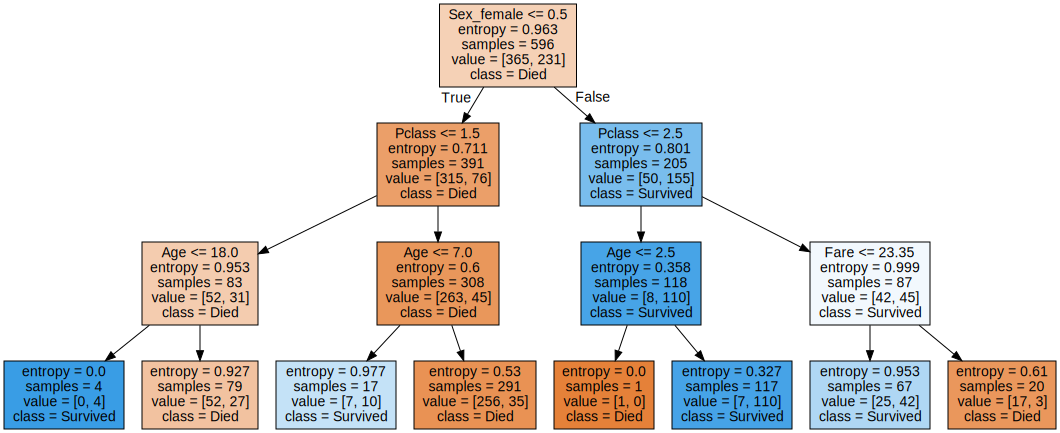

In [17]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)

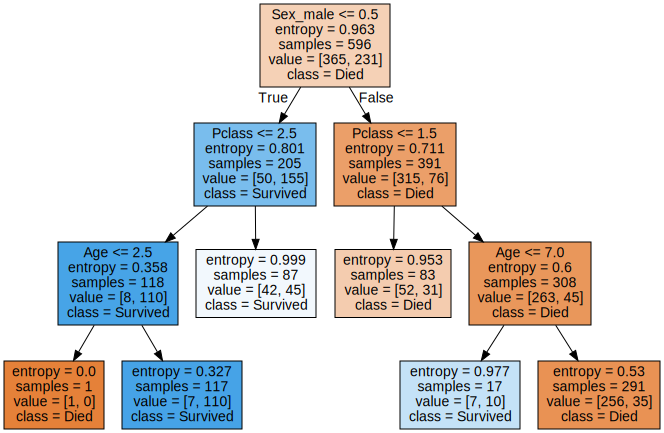

In [19]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [20]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

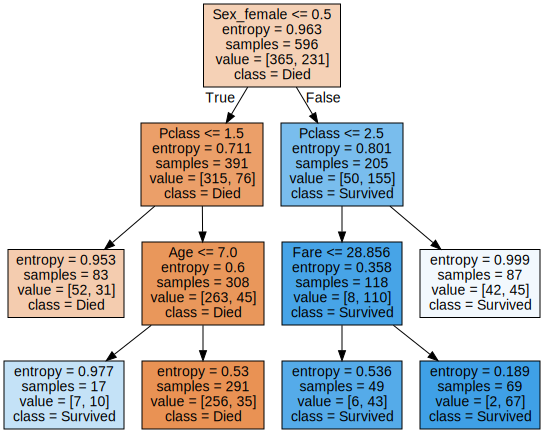

In [22]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

# 3.2 Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
clf_rf = RandomForestClassifier()

In [34]:
parametrs = {'n_estimators' : [10, 20, 30], 'max_depth' : [2, 5, 7, 10]}

In [35]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv = 5)

In [37]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [38]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

# Задача

Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, 
поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и 
поместите его в переменную 
predictions.

In [47]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf = rf.fit(X_train, y_train)
predictions_15 = rf.predict(X_test)
predictions_15

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

# Продолжение

In [48]:
best_clf = grid_search_cv_clf.best_estimator_

In [49]:
best_clf.score(X_test, y_test)

0.8203389830508474

In [51]:
feature_importances = best_clf.feature_importances_

In [52]:
feature_importances_df = pd.DataFrame({'feature' : list(X_train),
                                       'feature_importances' : feature_importances})

In [55]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature,feature_importances
6,Sex_male,0.275748
5,Sex_female,0.233071
4,Fare,0.143217
1,Age,0.116272
0,Pclass,0.110241
2,SibSp,0.042672
3,Parch,0.037284
7,Embarked_C,0.022685
8,Embarked_Q,0.009719
9,Embarked_S,0.009091


# Задача

Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

Код для отрисовки важности фичей


imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Открываем и смотрим данные

In [79]:
Integrated = pd.read_csv('heart-disease.csv')
Integrated

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Определяем данные для обучения дерева решений

In [76]:
X_train_Integrated = Integrated.drop(['target'], axis=1)
y_train_Integrated = Integrated.target

Проверяем на неизвестные значения

In [78]:
Integrated.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot: >

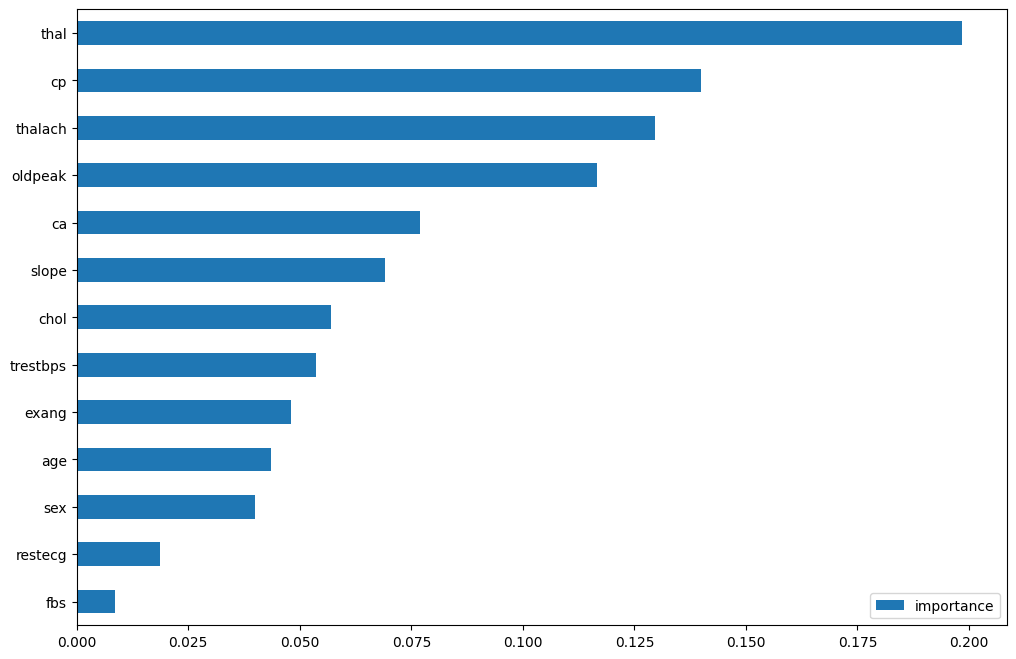

In [92]:
np.random.seed(0)
rf_Integrated = RandomForestClassifier(10, max_depth=5)
rf_Integrated.fit(X_train_Integrated, y_train_Integrated)
imp = pd.DataFrame(
    rf_Integrated.feature_importances_,
    index=X_train_Integrated.columns,
    columns=["importance"]
)
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))